In [5]:
import matplotlib.pyplot as plt
import numpy as np

### Chapter 2 - Mathematical fundamentals of Neural Networks

In [11]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [20]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [14]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

To make the above network ready for training, we need to pick three more things as part of the compilation step:
- A loss function: How network will measure performance on the training data
- An optimiser: The mechanism through which the network will update itself based on the data and the loss function
- Metrics to monitor during training and testing

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
def format_data(data):
    data = data.reshape(data.shape[0], -1)
    data = data.astype('float32') / 255
    return data

In [17]:
train_images = format_data(train_images)
test_images = format_data(test_images)

In [21]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [29]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0291 - accuracy: 0.9912
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0218 - accuracy: 0.9936
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0166 - accuracy: 0.9952
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0132 - accuracy: 0.9963
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0101 - accuracy: 0.9973
Epoch 6/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0081 - accuracy: 0.9979
Epoch 7/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0064 - accuracy: 0.9982
Epoch 8/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0049 - accuracy: 0.9986
Epoch 9/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0038 - accuracy: 0.9991
Epoch 10/10
60000/60000 [==============================

In [30]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/step


The TensorFlow machine learning framework places the colour depth axis at the end: (samples, height, width, color_depth).
The Theano framework places the color depth axis at the right: (samples, color_depth, height, width).

#### The gears of neural nets: tensor operations

All transformations learned by neural networks can be reduced to a handful of tensor operations applied to tensors on numeric data. A layer can be interpreted as a function which takes as input a 2D tensor and returns another 2D tensor. The function is as follows:

output = relu(dot(W, input, + b)

where W is a 2D tensor and b is a vector.

#### The engine of neural nets: gradient-based optimisation

The loss function is minimised and the weight values are optimised by use of stochastic gradient descent.
Momentum can help avoid getting stuck in a local minimum.

#### Looking back at the first example

Now we understand what happens when we call __fit__: the networks will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration is called an epoch). At each iteration, the network will compute the gradients of the weights with regards to the total of the loss on the batch, and update the weights accordingly.

#### Chapter summary 

- Learning means finding a combination of model parameters that minimises a loss function for a given set of training samples and corresponding targets.
- Draw random batches of data samples and their targets, and computing the gradient of the network parameters with respect to the loss on the batch. The network parameters are then moved in the direction opposite to the gradient.
- Learning process made possible by the fact that neural networks are chains of differentiable tensor operations, so it's possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.
- Two key concepts are loss and optimisers.
- Loss is what we minimise during training
- Optimiser specifies the exact way in which the gradient of the loss will be used to update parameters.

### Chapter 3 - Getting Started with Neural Networks

#### 3.1.1. Layers: building blocks of deep learning

Fundamental structure of neural networks is called the layers. Layer is a data processing module that takes as input one or more tensors and that outputs one or more tensors. Layers have a state characterised by the layers weights. Simple vector data stored in 2D tensors is often processes by densely connected layers. Sequence data, stored in 3D tensors of shape (samples, timesteps, features) is typically processes by recurrent layer such as an LSTM layer. Image data, stored in 4D tensors, is usually processed by 2D convolutional layers.

Buiding deep-learning models in keras is done by clipping together compatible layers to form useful data-transformation pipelines. When using Keras, you don't have to worry about compatibility, because the layers you add to your models are dynamically built to match the shape of income layer.

#### 3.1.2. Models: Networks of layers

A deep-learning models is a directed, acyclic graph of layers. The most common instance is a linear stack of layers, mapping a single input to a single output. 

Some other common network topologies include:
- Two-branch networks
- Multiohead networks
- Inception blocks

The topology of a network defines a _hypothesis space_. By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations. 

#### 3.1.3. Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, you still have to choose two or more things:
- __loss function__: Quantity that will be minimized during training
- __Optimiser__: Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent.

#### 3.2.2. Developing with Keras - a quick overview

The below code block defines the same model as defined above to perform classification on the mnist dataset but using the functional API.

In [34]:
input_tensor = layers.Input(shape=(784, ))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

With the functional API, you're manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions.

Once your model architecture is defined, it doesn't matter whether you used the _Sequential_ model or the functional API. All the following steps are the same. The learning process is configured in the compilation step, where you specify the optimizer and the loss functions that the model should use, as well as the metrics you want to monitor during training. The below cell shows an example with a single loss function, which is by far the most common case:

In [35]:
from keras import optimizers 

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

Finally, the learning process consists of passing Numpy arrays of input data and the corresponding target data  to the model via the fit() method, similar to what you would do in Scikit-Learn and several other machine-learning libraries.

In [37]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

#### 3.4 Classfiying movie reviews: a binary classification example

In [38]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 68s 4us/step


##### 3.4.2 Preparing the data

You can't feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways of doing that:
- Pad your lists to that they all have the same length, then turn them into an integer tensor of shape (samples, word_indices), then use as the first layer in your network a layer capable of handling such integer tensors (the embedding layer, which will be covered in more detail later).
- One-hot encode your lists to turn them into vectors of 0s and 1s.

In [47]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [49]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [54]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

##### 3.4.3 Building your network

The input data is vectors and the labels are scalars (1s and 0s): this is the easiest setup ever. A type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers with relu activations.

The argument being passed to the Dense layer (16) is the number of hidden units of the layer. A hidden unit is the dimension in the respresentation space of the layer. Each such Dense layer with a relu activation implements the following chain of tensor operations:

output = relu(dot(W, input) + b

Having 16 hidden units means the weight matrix will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation-space (and then you'll add the bias vector b and apply the relu operation). The representation space can be intuitively understood as "how much freedom you're allowing the network to have when learning internal representations."

There are two key architecture decisions to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer

The intermediate layers will use relu as their activation function, with the final layer using a sigmoid activation function so as to output a probability.

In [56]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### What are activation functions and why are they necessary?

Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations - a dot product and an addition:

output = dot(W, input) + b

So the layer could only learn linear transformations, of the input data, the hypothesis space of the layer would be the set of all possible linear transformations of the linear data into a 16 dimensional space. Such a hypothesis space is too restricted and wouldn't benefit from multiple layers of representations.

In [57]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### 3.4.4. Validating your approach

In order to monitor during training the accuracy of the model on data it has never seen before, you'll create a validation set by setting apart 10000 smaples from the original training data

In [61]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [62]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.5517 - accuracy: 0.7659 - val_loss: 0.4454 - val_accuracy: 0.8346
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.3533 - accuracy: 0.8973 - val_loss: 0.3628 - val_accuracy: 0.8565
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2522 - accuracy: 0.9236 - val_loss: 0.3016 - val_accuracy: 0.8827
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1946 - accuracy: 0.9401 - val_loss: 0.2985 - val_accuracy: 0.8796
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1583 - accuracy: 0.9501 - val_loss: 0.2827 - val_accuracy: 0.8855
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1295 - accuracy: 0.9603 - val_loss: 0.2915 - val_accuracy: 0.8849
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [64]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

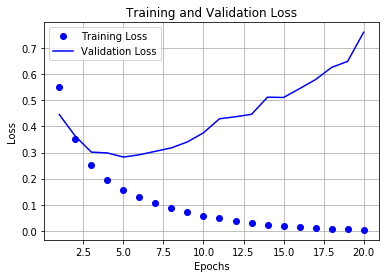

In [72]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

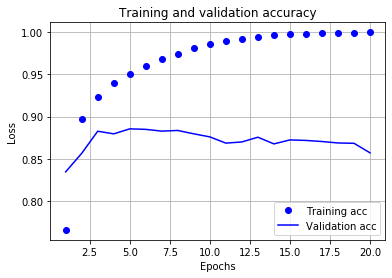

In [78]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

We can clearly see overfitting in the above, we end up learning representations that are specific to the training data and don't generalise to data outside of the training set.

In [80]:
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2181 - accuracy: 0.9469
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1365 - accuracy: 0.9594
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.1057 - accuracy: 0.9682
Epoch 4/4
25000/25000 [==============================] - 9s 380us/step


In [81]:
results

[0.487286272251606, 0.8610000014305115]

### 3.5 Classifying newswires: a multiclass classification example

#### 3.5.1 Reuters dataset

In [82]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 7s 3us/step


In [85]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [86]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#### 3.5.3 Building your network

The number of output cases in this example has gone from 2 to 46. The dimensionality of the output space is much larger. In a stack of dense layers, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers, each layer can potentially become an information bottleneck. A 16 dimensional space may be two limited to seperate 46 different classes: such small layers act as information bottlenecks, permanently dropping relevant information. Therefore in this example we use larger layers. Let's go with 64 units.

In [124]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two noteworthy things above the above architecture:
- You end the network with a dense layer of size 46. This means for each input sample, the network will output a 46 dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
- The last layer uses softmax activation. The network will output a probability distribution over the 46 classes.

The best loss function to use here is categorical_crossentropy. It measures the distance between two probability distributions.

In [125]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [126]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [127]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 126us/step - loss: 2.7168 - accuracy: 0.4843 - val_loss: 1.7362 - val_accuracy: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.4524 - accuracy: 0.6929 - val_loss: 1.3330 - val_accuracy: 0.7030
Epoch 3/20
7982/7982 [==============================] - 1s 110us/step - loss: 1.0944 - accuracy: 0.7524 - val_loss: 1.1700 - val_accuracy: 0.7370
Epoch 4/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.8820 - accuracy: 0.7994 - val_loss: 1.0660 - val_accuracy: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.7055 - accuracy: 0.8419 - val_loss: 1.0248 - val_accuracy: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.5691 - accuracy: 0.8736 - val_loss: 1.0117 - val_accuracy: 0.7890
Epoch 7/20
7982/7982 [==============================] - 1s 113us/step - loss

In [128]:
history_dict = history.history

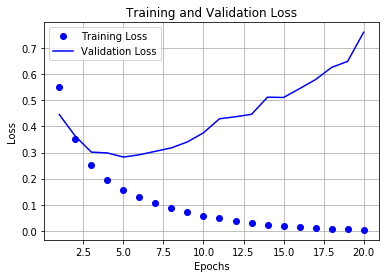

In [129]:
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

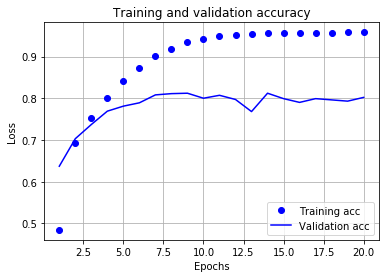

In [130]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [131]:
model.fit(x_train,
          one_hot_train_labels,
          epochs=5,
          batch_size=512)

Epoch 1/5
8982/8982 [==============================] - 1s 105us/step - loss: 0.2345 - accuracy: 0.9392
Epoch 2/5
8982/8982 [==============================] - 1s 100us/step - loss: 0.1710 - accuracy: 0.9502
Epoch 3/5
8982/8982 [==============================] - 1s 102us/step - loss: 0.1496 - accuracy: 0.9520
Epoch 4/5
8982/8982 [==============================] - 1s 101us/step - loss: 0.1387 - accuracy: 0.9516
Epoch 5/5
8982/8982 [==============================] - 1s 102us/step - loss: 0.1285 - accuracy: 0.9564


In [132]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 111us/step


[1.3456930948598833, 0.7827248573303223]

The below sell roughly determines the accuracy with purely random guesswork on the test set 

In [133]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1981300089047195